In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

In [3]:
tcs= pd.read_csv('tcs_stock.csv')
infy= pd.read_csv('infy_stock.csv')

In [4]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [5]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [6]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
Date                  249 non-null object
Symbol                249 non-null object
Series                249 non-null object
Prev Close            249 non-null float64
Open                  249 non-null float64
High                  249 non-null float64
Low                   249 non-null float64
Last                  249 non-null float64
Close                 249 non-null float64
VWAP                  249 non-null float64
Volume                249 non-null int64
Turnover              249 non-null float64
Trades                249 non-null int64
Deliverable Volume    249 non-null int64
%Deliverble           249 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.3+ KB


In [7]:
print(tcs['Symbol'].value_counts())

print(tcs['Series'].value_counts())

TCS    249
Name: Symbol, dtype: int64
EQ    249
Name: Series, dtype: int64


In [8]:
infy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
Date                  249 non-null object
Symbol                249 non-null object
Series                249 non-null object
Prev Close            249 non-null float64
Open                  249 non-null float64
High                  249 non-null float64
Low                   249 non-null float64
Last                  249 non-null float64
Close                 249 non-null float64
VWAP                  249 non-null float64
Volume                249 non-null int64
Turnover              249 non-null float64
Trades                249 non-null int64
Deliverable Volume    249 non-null int64
%Deliverble           249 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 29.3+ KB


In [9]:
print(infy['Symbol'].value_counts())

print(infy['Series'].value_counts())

INFY    249
Name: Symbol, dtype: int64
EQ    249
Name: Series, dtype: int64


In [10]:
tcs.shape, infy.shape

((249, 15), (249, 15))

In [11]:
tcs['Date']=pd.to_datetime(tcs['Date'])
infy['Date']=pd.to_datetime(infy['Date'])

In [12]:
tcs.index=tcs['Date']
infy.index=infy['Date']

In [13]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2015-01-01 to 2016-01-01
Data columns (total 15 columns):
Date                  249 non-null datetime64[ns]
Symbol                249 non-null object
Series                249 non-null object
Prev Close            249 non-null float64
Open                  249 non-null float64
High                  249 non-null float64
Low                   249 non-null float64
Last                  249 non-null float64
Close                 249 non-null float64
VWAP                  249 non-null float64
Volume                249 non-null int64
Turnover              249 non-null float64
Trades                249 non-null int64
Deliverable Volume    249 non-null int64
%Deliverble           249 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 31.1+ KB


In [14]:
def rolling_weeks(df,weeks=[4, 16, 28, 40, 52]):
    temp=pd.DataFrame()
    temp['Close'] = df['Close'].resample('W').mean() 
    for each in weeks:
        temp['Close'].rolling(each).mean().plot(figsize=(10,6))

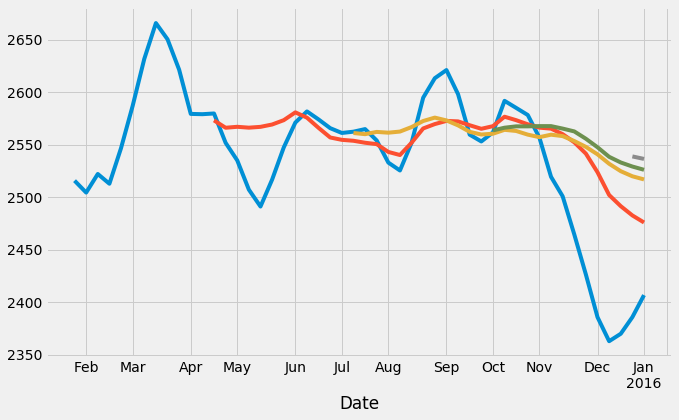

In [15]:
rolling_weeks(tcs)

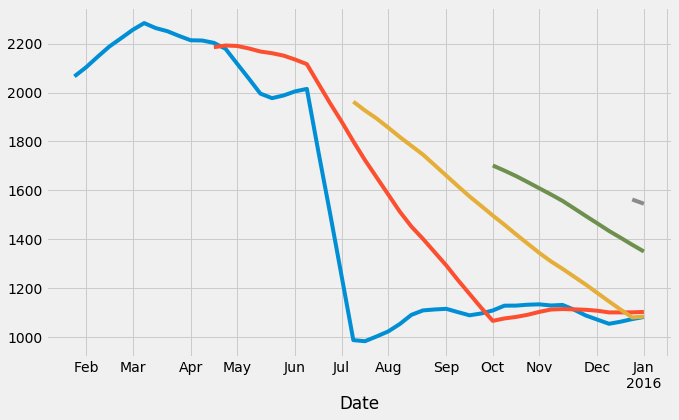

In [16]:
rolling_weeks(infy)

In [17]:
def rolling_window(df,window=[1,10,75]):
    for each in window:
        df['Close'].rolling(each).mean().plot(figsize=(10,6))

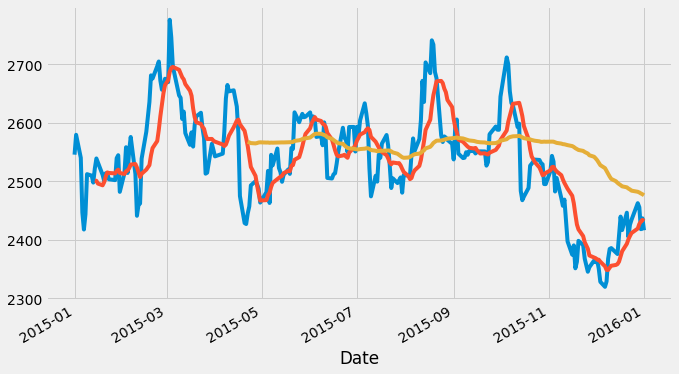

In [18]:
rolling_window(tcs)

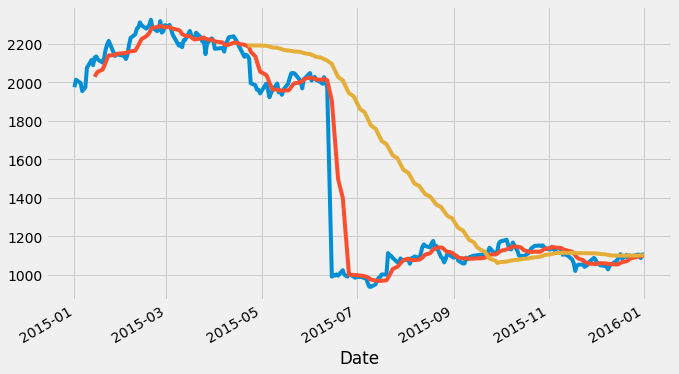

In [19]:
rolling_window(infy)

In [20]:
def volume_shocks(df):
    df["Volume_next_day"] = df.Volume.shift(1)
    df["volume_shock"] = (((abs(df["Volume_next_day"] - df["Volume"])/df["Volume"])*100)  > 10).astype(int)
    df["volume_dir"]=((df["Volume_next_day"] - df["Volume"])>0).astype(int)
    return df

In [21]:
tcs=volume_shocks(tcs)
infy=volume_shocks(infy)

In [22]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_next_day,volume_shock,volume_dir
Date,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,0,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,183415.0,1,0
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,462870.0,1,0
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,877121.0,1,0
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,1211892.0,0,0


In [23]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_next_day,volume_shock,volume_dir
Date,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,0,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,500691.0,1,0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,1694580.0,1,0
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2484256.0,0,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2416829.0,1,1


In [24]:
def price_shocks(df):
    df["Close_next_day"] = df.Close.shift(1)
    df["Close_shock"] = (((abs(df["Close_next_day"] - df["Close"])/df["Close"])*100)  > 2).astype(int)
    df["Close_dir"]=((df["Close_next_day"] - df["Close"])>0).astype(int)
    return df

In [25]:
tcs=price_shocks(tcs)
infy=price_shocks(infy)

In [26]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_next_day,volume_shock,volume_dir,Close_next_day,Close_shock,Close_dir
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,...,4.674345e+13,8002,52870,0.2883,NaN,0,0,NaN,0,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,...,1.188740e+14,27585,309350,0.6683,183415.0,1,0,2545.55,0,0
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,...,2.248886e+14,43234,456728,0.5207,462870.0,1,0,2579.45,0,1
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,...,2.989615e+14,84503,714306,0.5894,877121.0,1,0,2540.25,1,1
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,...,3.208362e+14,101741,886368,0.6724,1211892.0,0,0,2446.60,0,1


In [27]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_next_day,volume_shock,volume_dir,Close_next_day,Close_shock,Close_dir
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,9.870306e+13,14908,258080,0.5154,NaN,0,0,NaN,0,0
2015-01-02,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,3.394669e+14,54166,1249104,0.7371,500691.0,1,0,1974.4,0,0
2015-01-05,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,4.979911e+14,82694,1830962,0.7370,1694580.0,1,0,2013.2,0,1
2015-01-06,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,4.724458e+14,108209,1772070,0.7332,2484256.0,0,1,1995.9,1,1
2015-01-07,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,3.557162e+14,62463,1317720,0.7270,2416829.0,1,1,1954.2,0,0


In [28]:
tcs['price_shock_w/0_vol_shock']=tcs['Close_shock'] & ~tcs['volume_shock']
infy['price_shock_w/0_vol_shock']=infy['Close_shock'] & ~infy['volume_shock']

In [29]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,Volume_next_day,volume_shock,volume_dir,Close_next_day,Close_shock,Close_dir,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,...,8002,52870,0.2883,NaN,0,0,NaN,0,0,0
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,...,27585,309350,0.6683,183415.0,1,0,2545.55,0,0,0
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,...,43234,456728,0.5207,462870.0,1,0,2579.45,0,1,0
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,...,84503,714306,0.5894,877121.0,1,0,2540.25,1,1,0
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,...,101741,886368,0.6724,1211892.0,0,0,2446.60,0,1,0


In [32]:
tcs.to_csv('tcs_updated.csv')
infy.to_csv('infy_updated.csv')
